In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import scipy 
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_avo = pd.read_csv('avocado.csv')
df_avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
df = df_avo.iloc[:,1:]
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


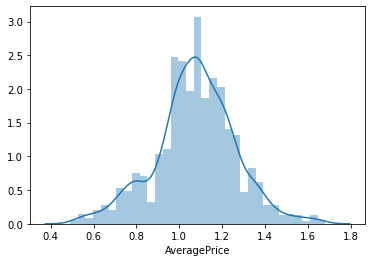

In [4]:
#Visualization of data
sns.distplot(df.AveragePrice)

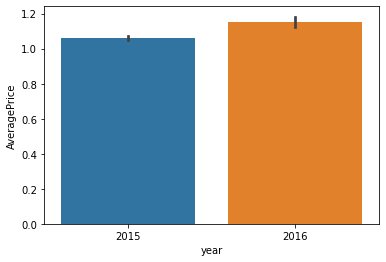

In [5]:
#Average Price of avocado per unit is between 1.0 and 1.2 for both years
sns.barplot(df.year,df.AveragePrice)

In [6]:
#we can see that the average price of units went up in the year 2016
#Dividing dataframe comparing results of both year(2015 and 2016)
df_1 = df[df.year == 2015]
df_1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,01-02-2015,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.0,conventional,2015,WestTexNewMexico
1266,25-01-2015,0.80,720800.61,519142.82,124248.86,10573.29,66835.64,65072.69,1762.95,0.0,conventional,2015,WestTexNewMexico
1267,18-01-2015,0.80,729795.72,516446.41,128438.87,12473.14,72437.30,71564.22,873.08,0.0,conventional,2015,WestTexNewMexico
1268,11-01-2015,0.92,584896.99,347125.63,129717.42,27944.07,80109.87,78503.46,1606.41,0.0,conventional,2015,WestTexNewMexico


In [7]:
df_2 = df[df.year == 2016]
df_2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1270,25-12-2016,1.52,73341.73,3202.39,58280.33,426.92,11432.09,11017.32,411.83,2.94,conventional,2016,Albany
1271,18-12-2016,1.53,68938.53,3345.36,55949.79,138.72,9504.66,8876.65,587.73,40.28,conventional,2016,Albany
1272,11-12-2016,1.49,71777.85,2323.39,56545.79,86.65,12822.02,12176.75,645.27,0.00,conventional,2016,Albany
1273,04-12-2016,1.48,113031.96,6530.78,99746.05,50.84,6704.29,6476.12,228.17,0.00,conventional,2016,Albany
1274,27-11-2016,1.52,58171.89,2793.99,47106.18,18.14,8253.58,7973.98,279.60,0.00,conventional,2016,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [8]:
df_1['Total Volume'].mean()

1610065.4229527568

In [9]:
df_2["Total Volume"].mean()

1559787.2824291498

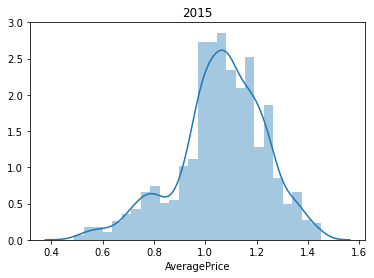

Std Dev : 0.17192184107344954 Mean Price :  1.060110236220472 





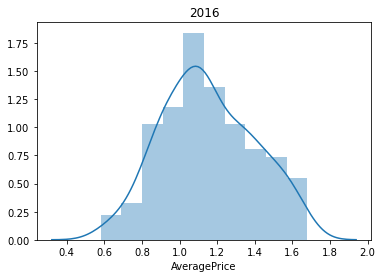

Std Dev : 0.24574216236075408 Mean Price :  1.151497975708502 





In [10]:
#Avocados are more sold in year 2016 than 2015 (ignoring the fact the we have less amount of data for year 2016)
list1 = [df_1,df_2]
for i in list1:
    if str(i) == str(df_1):
        plt.title('2015')
    else:
        plt.title('2016')
    sns.distplot(i.AveragePrice)
    plt.show()
    print('Std Dev :',i.AveragePrice.std(),'Mean Price : ',i.AveragePrice.mean(),'\n\n\n')

In [11]:
#Mean Price in 2016 is higher and since standard deviation is also higher we can say that price range is larger in 2016

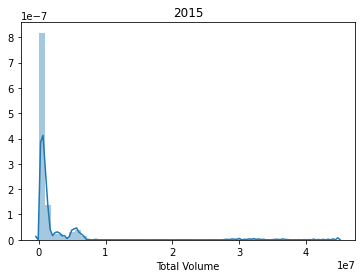

Std Dev : 4725962.579241653 Mean Volume :  1610065.4229527568  Total Volume :  2044783087.15 





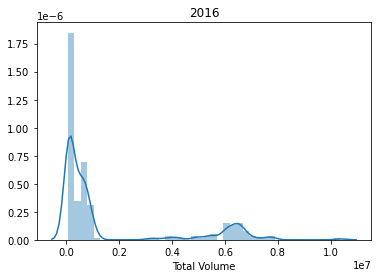

Std Dev : 2428063.954504832 Mean Volume :  1559787.2824291498  Total Volume :  385267458.76 





In [12]:
#Check Volume sold in both year
list1 = [df_1,df_2]
for i in list1:
    if str(i) == str(df_1):
        plt.title('2015')
    else:
        plt.title('2016')
    sns.distplot(i['Total Volume'])
    plt.show()
    print('Std Dev :',i['Total Volume'].std(),'Mean Volume : ',i['Total Volume'].mean(),' Total Volume : ',i['Total Volume'].sum(),'\n\n\n')

In [13]:
# 1 -- Volume is a highly skewed data as Avocados are season fruit and thus sold most in season
# 2 -- Mean volume sold in 2016 is less as the prices went up
# 3 -- Total volume is less in 2016 as we have less data for that 

In [14]:
#Revenue generated from avocados in 2015
revenue1 = df_1['Total Volume'].multiply(df_1['AveragePrice'],axis=0)
revenue1.sum()

2034601316.1269

In [15]:
#Revenue generated from avocados in 2016
revenue2 = df_2['Total Volume'].multiply(df_2['AveragePrice'],axis=0)
revenue2.sum()

399355985.2965

In [16]:
#More money generated from selliing avocados in 2016
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [17]:
df['region'] = df['region'].replace(['California','SouthCentral','SanDiego','SanFransico','LosAngeles'],'California')
df['region'] = df['region'].replace(['Albany','BuffaloRochester','NewYork','Syracuse'],'NewYork')
df['region'] = df['region'].replace('Boise','Idaho')
df['region'] = df['region'].replace(['BallimoreWashington','Spokane','Seattle'],'Washington')
df['region'] = df['region'].replace(['Boston','NorthernNewEngland','HartfordSpringfield'],'Massachusetts')
df['region'] = df['region'].replace(['Atlanta'],'Georgia')
df['region'] = df['region'].replace(['TotalUS','GreatLakes','Northeast','Southeast','Plains'],'Others')

In [18]:
df['region'] = df['region'].replace('PhoenixTucson','Arizona')
df['region'] = df['region'].replace('Columbus','Ohio')
df['region'] = df['region'].replace(['Jacksonville','Tampa','Orlando','MiamiFtLauderdale'],'Florida')
df['region'] = df['region'].replace(['Michigan','GrandRapids'],'Michigan')
df['region'] = df['region'].replace(['West','LasVegas'],'Nevada')
df['region'] = df['region'].replace('Louisville','Kentucky')
df['region'] = df['region'].replace(['Charlotte','Midsouth','RaleighGreenshoro'],'North Carolina')
df['region'] = df['region'].replace('Portland','Oregon')
df['region'] = df['region'].replace(['Houston','DallasFtWorth'],'Texas')
df['region'] = df['region'].replace('WestTexNewMexico','New Mexico')

In [19]:
df['region'] = df['region'].replace('Nashville','Tennessee')
df['region'] = df['region'].replace('Denver','Colorado')
df['region'] = df['region'].replace(['Pittsburg','HarrisburgScranton','Philadelphia'],'Pennsylvania')
df['region'] = df['region'].replace('Chicago','Illinos')
df['region'] = df['region'].replace(['RichmondNorfolk','Roanoke'],'Virginia')
df['region'] = df['region'].replace('StLouis','Missouri')
df['region'] = df['region'].replace('Indianapolis','Indiana')

In [20]:
df.region.value_counts()

NewYork                181
California             156
Florida                113
Massachusetts          104
Others                  76
Idaho                   65
BaltimoreWashington     65
Washington              58
Georgia                 54
Arizona                 52
North Carolina          49
Ohio                    47
Texas                   46
Nevada                  46
Detroit                 40
Virginia                38
Kentucky                34
Pennsylvania            32
Oregon                  30
New Mexico              27
Tennessee               25
Colorado                24
SouthCarolina           24
Michigan                23
Illinos                 23
Pittsburgh              22
RaleighGreensboro       16
Missouri                16
Indiana                 16
SanFrancisco            15
Name: region, dtype: int64

In [21]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,NewYork
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,NewYork
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,NewYork
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,NewYork
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,NewYork
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,North Carolina
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,North Carolina
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,North Carolina
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,North Carolina


In [22]:
df.dtypes
#'type' will be dropped as no use of this column as only one type of avocado dataset available
df.drop(columns = 'type',inplace=True)

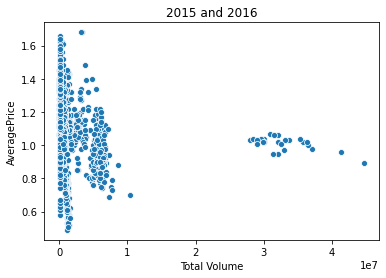

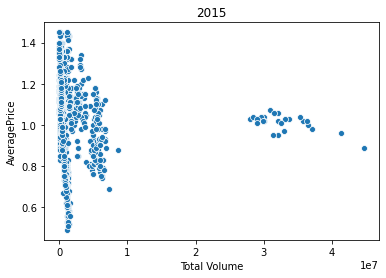

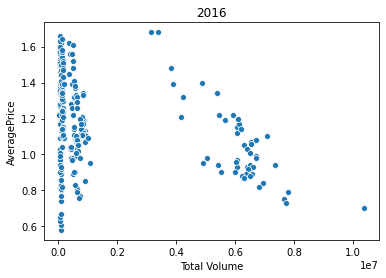

In [23]:
plt.title('2015 and 2016')
sns.scatterplot(df['Total Volume'],df['AveragePrice'])
plt.show()

plt.title('2015')
sns.scatterplot(df_1['Total Volume'],df_1['AveragePrice'])
plt.show()

plt.title('2016')
sns.scatterplot(df_2['Total Volume'],df_2['AveragePrice'])
plt.show()

In [24]:
#From graph we can tell us that supply remain constant for most of the time and thus price change does not completely
#depend on the Total volume
#But the volume increase 

# --In 2015,
#   Prices stay constant with the increase in the volume
# --In 2016,
#   Prices are seen to decrease when the supply(total volume) increases 

In [25]:
#Changing the object to datetime  
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                     int64
region                  object
dtype: object

In [27]:
df_avo_dates = pd.DataFrame()
df_avo_dates['month'] = df['Date'].dt.month_name()
df_avo_dates['day'] = df['Date'].dt.day_name()
df_avo_dates['Total_Volume'] = df['Total Volume']
df_avo_dates['Price'] = df['AveragePrice']

In [28]:
df_avo_dates

,month,day,Total_Volume,Price
0,December,Sunday,64236.62,1.33
1,December,Sunday,54876.98,1.35
2,December,Sunday,118220.22,0.93
3,June,Friday,78992.15,1.08
4,November,Sunday,51039.60,1.28
...,...,...,...,...
1512,October,Sunday,190846.01,1.39
1513,September,Saturday,178235.75,1.51
1514,February,Wednesday,178410.82,1.48
1515,September,Sunday,189131.52,1.47


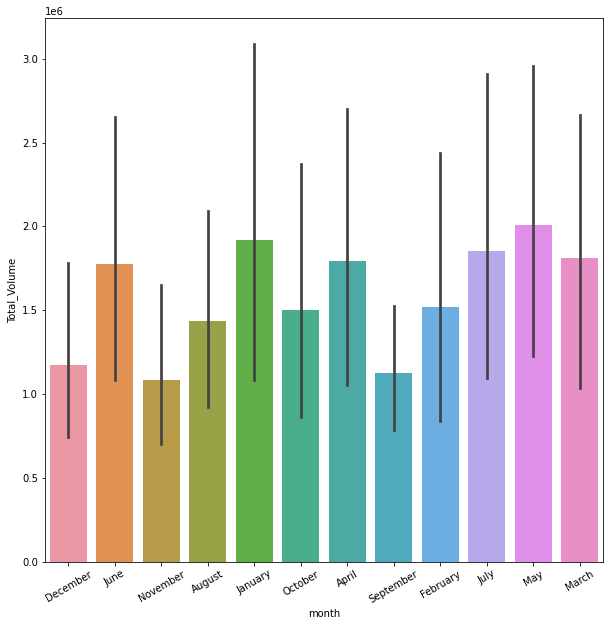

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x='month', y='Total_Volume', data=df_avo_dates)
plt.xticks(rotation = 30)
plt.show()

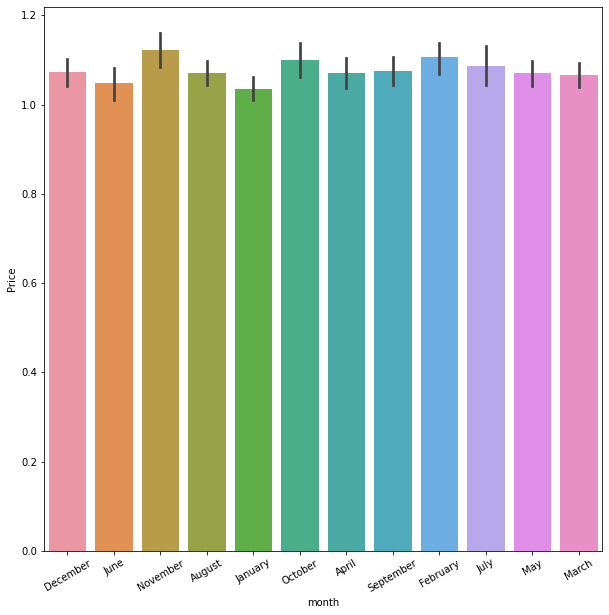

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x='month', y='Price', data=df_avo_dates)
plt.xticks(rotation = 30)
plt.show()

In [31]:
#Since avocado are all season fruit so we cannot see a wide change in prices
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,NewYork
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,NewYork
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,NewYork
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,NewYork
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,NewYork
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,North Carolina
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,North Carolina
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,North Carolina
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,North Carolina


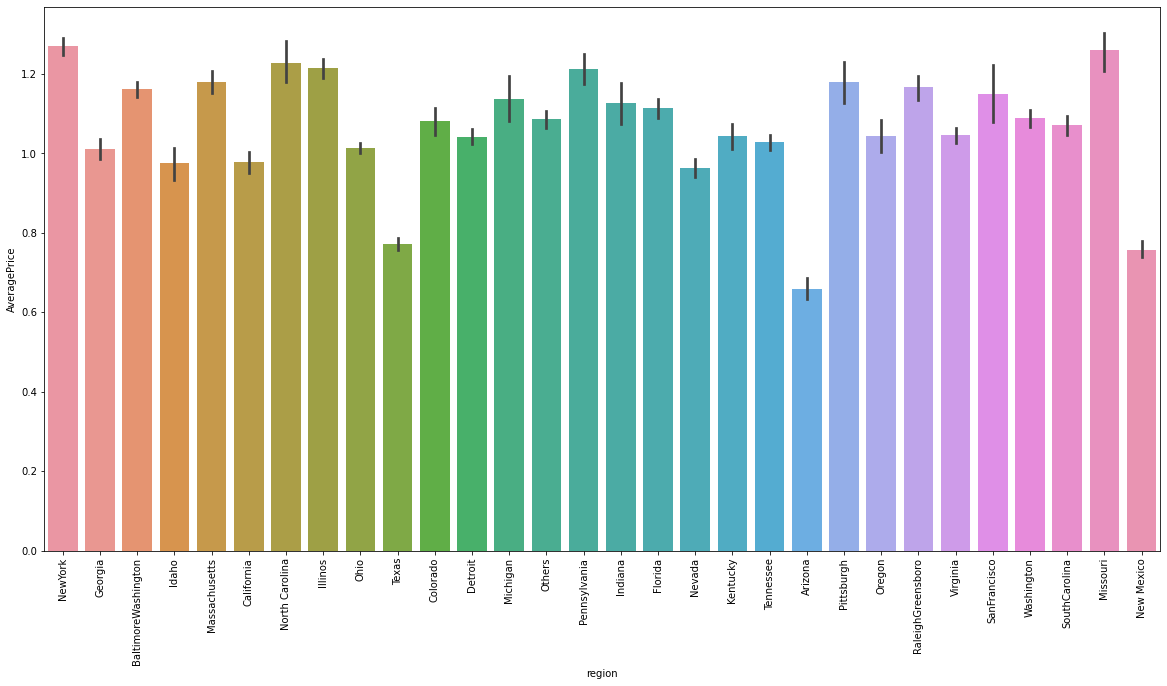

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation = 90)
plt.show()

In [33]:
#Now let's finalize the data for further processes 
df.drop(columns = ['Date'],inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,NewYork
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,NewYork
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,NewYork
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,NewYork
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,NewYork
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,North Carolina
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,North Carolina
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,North Carolina
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,North Carolina


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [35]:
df.region.unique()

array([16,  6,  1,  7, 11,  2, 17,  8, 18, 27,  3,  4, 12, 20, 21,  9,  5,
       14, 10, 26,  0, 22, 19, 23, 28, 24, 29, 25, 13, 15])

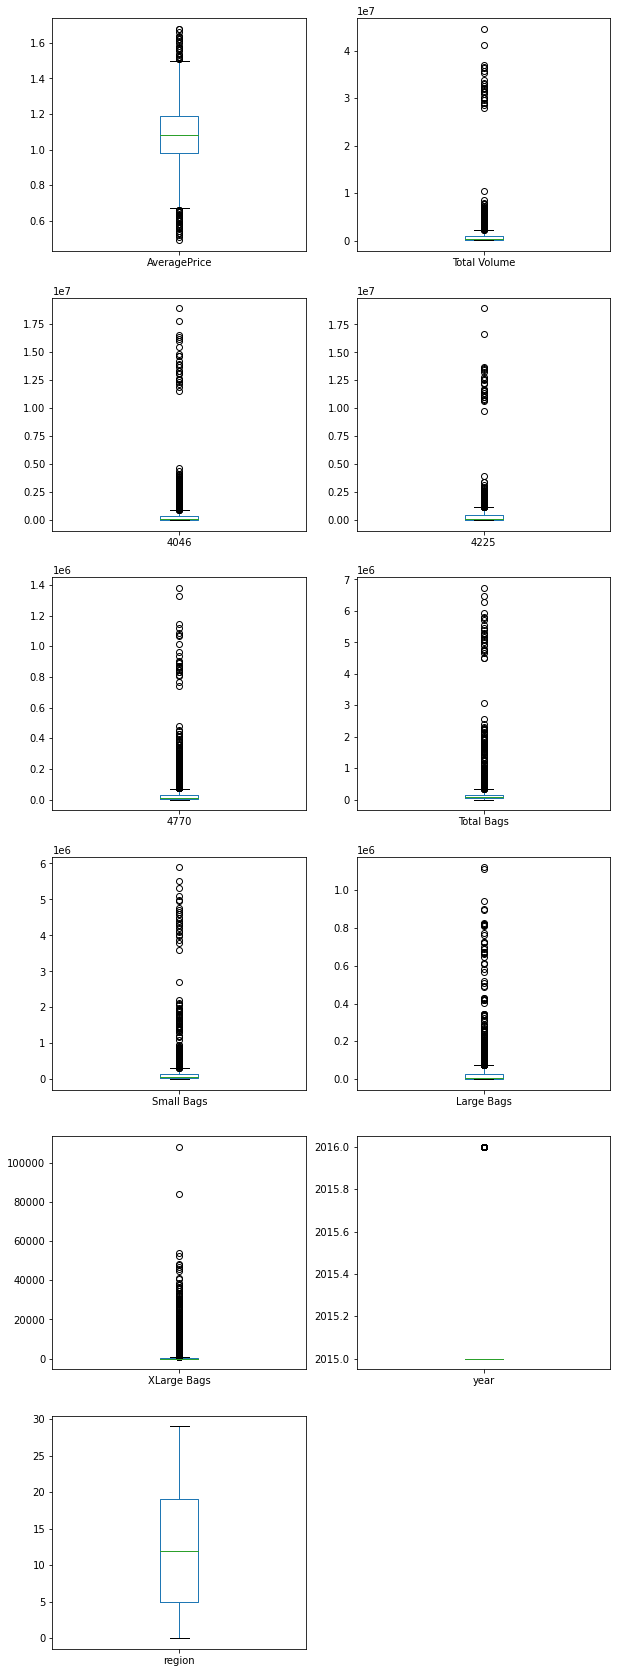

In [36]:
#Finding and removing outliers
df.plot(kind='box',layout=(6,2),subplots=True,figsize=(10,30))
plt.show()

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.29272731, 0.44100815,
        0.39779976],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.29272731, 0.44100815,
        0.39779976],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.29272731, 0.44100815,
        0.39779976],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.1820374 , 2.26753179,
        0.51414104],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.29272731, 2.26753179,
        0.51414104],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.29272731, 2.26753179,
        0.51414104]])

In [38]:
threshold = 3
np.where(z>3)

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
        1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
        1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
        1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
        1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
        1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
        1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
        1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
        1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
        1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
        1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
        1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
        1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
        1200, 1200, 1200, 1200, 1200, 

In [39]:
df = df[(z<3).all(axis=1)]
df
#Outliers are removed now 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,16
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,16
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,16
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,16
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,16
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,17
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,17
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,17
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,17


In [40]:
#Now we will check for skewness
df.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.283243
dtype: float64

In [41]:
for col in df.columns:
    if df.loc[:,col].skew() > 0.55:
        df[col] = np.log1p(df[col])

In [42]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.283243
dtype: float64

In [43]:
#Using power transform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for col in df.columns:
    if df.loc[:,col].skew() > 0.55 or df.loc[:,col].skew() < -0.55:
        df[col] = pt.fit_transform(df[col].to_frame())


In [44]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.480153
XLarge Bags     0.329230
year            2.004439
region          0.283243
dtype: float64

In [45]:
for col in df.columns:
    if df.loc[:,col].skew() > 0.55 or df.loc[:,col].skew() < -0.55:
        print('True')
    else:
        print('False')
#Not able to remove skewness in column 'year'

False
False
False
False
False
False
False
False
False
True
False


In [46]:
#Now let's transform the data after diving x and y column

df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,-1.066122,-0.877522,-0.399500,16
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,-1.054135,-0.877522,-0.399500,16
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,-1.038869,-0.877522,-0.399500,16
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,-0.967316,-0.877522,-0.399500,16
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,-0.856461,-0.877522,-0.399500,16
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,0.462033,1.171543,2.430295,17
1513,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,0.392863,-0.877522,2.430295,17
1514,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,0.378020,1.275233,2.430295,17
1515,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,0.378918,-0.877522,2.430295,17


In [47]:
x = df.iloc[:,1:]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,-1.066122,-0.877522,-0.399500,16
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,-1.054135,-0.877522,-0.399500,16
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,-1.038869,-0.877522,-0.399500,16
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,-0.967316,-0.877522,-0.399500,16
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,-0.856461,-0.877522,-0.399500,16
...,...,...,...,...,...,...,...,...,...,...
1512,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,0.462033,1.171543,2.430295,17
1513,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,0.392863,-0.877522,2.430295,17
1514,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,0.378020,1.275233,2.430295,17
1515,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,0.378918,-0.877522,2.430295,17


In [48]:
y = df.iloc[:,0]
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1512    1.39
1513    1.51
1514    1.48
1515    1.47
1516    1.43
Name: AveragePrice, Length: 1436, dtype: float64

In [49]:
#Using standard scaler method
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_x = sc.fit_transform(x)
df_x

array([[-1.41093543, -1.84734499, -0.50791653, ..., -0.87752233,
        -0.41387044,  0.3840233 ],
       [-1.53565988, -2.04282289, -0.63518322, ..., -0.87752233,
        -0.41387044,  0.3840233 ],
       [-0.92782951, -1.96816868, -0.06269814, ..., -0.87752233,
        -0.41387044,  0.3840233 ],
       ...,
       [-0.60188503, -0.11877204, -0.5265446 , ...,  1.2752325 ,
         2.41621506,  0.50043821],
       [-0.55566806, -0.04848702, -0.51812425, ..., -0.87752233,
         2.41621506,  0.50043821],
       [-0.58186397, -0.15181664, -0.51099782, ..., -0.87752233,
         2.41621506,  0.50043821]])

In [50]:
x = pd.DataFrame(df_x,columns=x.columns)
x
#Data is scaled and now we will move on 

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,-1.410935,-1.847345,-0.507917,-1.815979,-1.822359,-1.648547,-1.066122,-0.877522,-0.413870,0.384023
1,-1.535660,-2.042823,-0.635183,-1.739119,-1.746806,-1.573622,-1.054135,-0.877522,-0.413870,0.384023
2,-0.927830,-1.968169,-0.062698,-1.413794,-1.878029,-1.705109,-1.038869,-0.877522,-0.413870,0.384023
3,-1.247168,-1.807390,-0.329300,-1.651131,-2.164946,-1.996977,-0.967316,-0.877522,-0.413870,0.384023
4,-1.593074,-1.891150,-0.646768,-1.633730,-2.112115,-1.952576,-0.856461,-0.877522,-0.413870,0.384023
...,...,...,...,...,...,...,...,...,...,...
1431,-0.548521,-0.020619,-0.485823,0.586167,-0.189379,-0.193283,0.462033,1.171543,2.416215,0.500438
1432,-0.602663,-0.149612,-0.535121,0.627966,-0.135593,-0.097945,0.392863,-0.877522,2.416215,0.500438
1433,-0.601885,-0.118772,-0.526545,0.567203,-0.147557,-0.119231,0.378020,1.275233,2.416215,0.500438
1434,-0.555668,-0.048487,-0.518124,0.585318,-0.127164,-0.083522,0.378918,-0.877522,2.416215,0.500438


In [51]:
#now let's check skewness again which sometimes get induced due to data scaling
df.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.480153
XLarge Bags     0.329230
year            2.004439
region          0.283243
dtype: float64

In [53]:
#Since price is a continous we will use regression technique

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
models = [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),SVR(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    r2 = r2_score(y_test,pred)
    mae = mean_absolute_error(y_test,pred)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(m,'\n r2 score : ',r2,'\n mean abs err : ',mae,'\n mean squared err : ',mse,'\nroot mean squared error : ',rmse,'\n\n\n')

LinearRegression() 
 r2 score :  0.43410003120798724 
 mean abs err :  0.1134673565221693 
 mean squared err :  0.01995887926390038 
root mean squared error :  0.1412758976750825 



DecisionTreeRegressor() 
 r2 score :  0.7415124710190941 
 mean abs err :  0.0657638888888889 
 mean squared err :  0.009116666666666667 
root mean squared error :  0.09548123724935002 



KNeighborsRegressor() 
 r2 score :  0.8319846813454032 
 mean abs err :  0.059430555555555556 
 mean squared err :  0.005925777777777778 
root mean squared error :  0.07697907363548731 



RandomForestRegressor() 
 r2 score :  0.8593019389518141 
 mean abs err :  0.05295451388888888 
 mean squared err :  0.004962318020833336 
root mean squared error :  0.07044372236639214 



SVR() 
 r2 score :  0.7968702551958176 
 mean abs err :  0.0661706418173874 
 mean squared err :  0.007164237983804597 
root mean squared error :  0.08464182171837158 



GradientBoostingRegressor() 
 r2 score :  0.759357866744623 
 mean abs err :  

In [55]:
#KNN and RandomForest are giving good results now we will vary random state for these models and check the best r2score
def best_r2_random(model):
    r2score = 0
    m = 0
    random = 0
    for i in range(0,200):
        x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        r2 = r2_score(y_test,pred)
        if r2 > r2score:
            r2score = r2
            m = model
            random = i
    return print('For best r2 score : ',r2score,'for model : ',m,'for random state : ',random)

In [56]:
mlist = [RandomForestRegressor(),KNeighborsRegressor()]
for m in mlist:
    best_r2_random(m)

For best r2 score :  0.8801917318201169 for model :  RandomForestRegressor() for random state :  138
For best r2 score :  0.854835842299722 for model :  KNeighborsRegressor() for random state :  130


In [57]:
#checking cross validation score
mlist = [RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]
for m in mlist:
    cvs = cross_val_score(m,x,y,cv=5,scoring='r2').mean()
    print('Cross val score : ',cvs,'for model ',m)

Cross val score :  0.1875123774309369 for model  RandomForestRegressor()
Cross val score :  -0.2765837878383246 for model  KNeighborsRegressor()
Cross val score :  0.1627442943751063 for model  GradientBoostingRegressor()


In [58]:
#Let's for best parameters
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    
    grd = GridSearchCV(model,para,cv=5,scoring='r2')
    grd.fit(x,y)
    return [grd.best_params_, grd.best_score_]

In [59]:
#KNN 
knn = KNeighborsRegressor()
params = {
    'n_neighbors':list(range(1,15,2)),
    'weights':['uniform','distance'],
    'algorithm':['auto','bull_tree','kd_tree','brute']
}
best_parameter(knn,params)

[{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'uniform'},
 -0.19460137213081694]

In [60]:
#Random Forest Regressor
rfr = RandomForestRegressor()
params = {
    'n_estimators':list(range(180,220,2)),
    'criterion':['mae','mse']
}
best_parameter(rfr,params)

[{'criterion': 'mse', 'n_estimators': 190}, 0.22587325902546507]

In [ ]:
#AdaBoost Regressor
abr = AdaBoostRegressor()
params = {
    'base_estimator':[rfr],
    'n_estimators':list(range(50,350,2)),
    'learning_rate':[0.001,0.01,0.1,1]
}
best_parameter(abr,params)

In [59]:
#Finalizing Model : Best result is shown by AdaBoostRegressor
#Increasing n_estimators by half and decreasing learning rate by the same increases accuracy 
rfr =RandomForestRegressor()
abr_final = AdaBoostRegressor(base_estimator=rfr,learning_rate=0.05,n_estimators=300)
#rfr = RandomForestRegressor(criterion='mse',n_estimators=190)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)
abr_final.fit(x_train,y_train)
pred = abr_final.predict(x_test)
r2 = r2_score(y_test,pred)
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print('\nr2 score : ',r2,'\n mean abs err : ',mae,'\n mean squared err : ',mse,'\nroot mean squared error : ',rmse,'\n\n\n')


r2 score :  0.8036447042356696 
 mean abs err :  0.057374652777777806 
 mean squared err :  0.005927439270833338 
root mean squared error :  0.07698986472798441 





In [61]:
import joblib
joblib.dump(rfr,'Project3_Avocado1.csv')

['Project3_Avocado1.csv']